<a href="https://colab.research.google.com/github/drshaheed/Sales-Prediction-Project-ML/blob/main/Wallmart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Modules

In [1]:


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle 
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


# Importing Datasets

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Data Colab/train.csv')
stores = pd.read_csv('/content/drive/MyDrive/Data Colab/stores.csv')
features = pd.read_csv('/content/drive/MyDrive/Data Colab/features.csv')

#   EDA

In [3]:
data.shape     


(421570, 5)

In [4]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


Dataset containing information of Stores


In [6]:
stores.shape

(45, 3)

In [7]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [8]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


# Feature data of Stores

In [9]:
features.shape

(8190, 12)

In [10]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [11]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# Handling missing values of features dataset

In [12]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [13]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [14]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# Merging Training Dataset and merged stores-features Dataset

In [15]:
data = pd.merge(data,stores,on='Store',how='left')
     
data = pd.merge(data,features,on=['Store','Date'],how='left')
     
data['Date'] = pd.to_datetime(data['Date'])
     
data.sort_values(by=['Date'],inplace=True)
     
data.set_index(data.Date, inplace=True)
     
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()
     


True

In [16]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [17]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


# Splitting Date Column

In [18]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week

<ipython-input-18-5a11e9e33be7>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [20]:
data.head()


,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5



# Outlier Detection and Abnormalities


In [21]:
#Outliers

agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [22]:


store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data
     


In [23]:


data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()
     


,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [24]:


data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)
     


In [25]:


numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()
     


In [26]:


data.shape
     


(421533, 20)

In [27]:


data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape
     


(375438, 20)

# Negative Weekly Sales


In [ ]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()


In [29]:
data=data[data['Weekly_Sales']>=0]

In [30]:
data.shape


(374247, 20)

In [31]:
data['IsHoliday'] = data['IsHoliday'].astype('int')

In [32]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.480,9854.349032,0.00
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.050,290.954675,0.00
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.040,307.436056,0.00
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.970,756.223236,0.00
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.600,3874.176095,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,A,202307,69.79,3.506,223.078337,6.170,0,2012,10,43,19679.04,4179.99,9347.725105,8762.990,2825.107609,9678.80
2012-10-26,38,23,2012-10-26,53.12,C,39690,65.95,4.301,131.193097,10.199,0,2012,10,43,289.78,3.50,37.848679,31.365,34.065601,502.88
2012-10-26,27,6,2012-10-26,5339.65,A,204184,58.99,4.071,142.762411,8.000,0,2012,10,43,41005.33,2524.01,7730.729091,6798.780,5178.928257,10969.27


# Data Viz

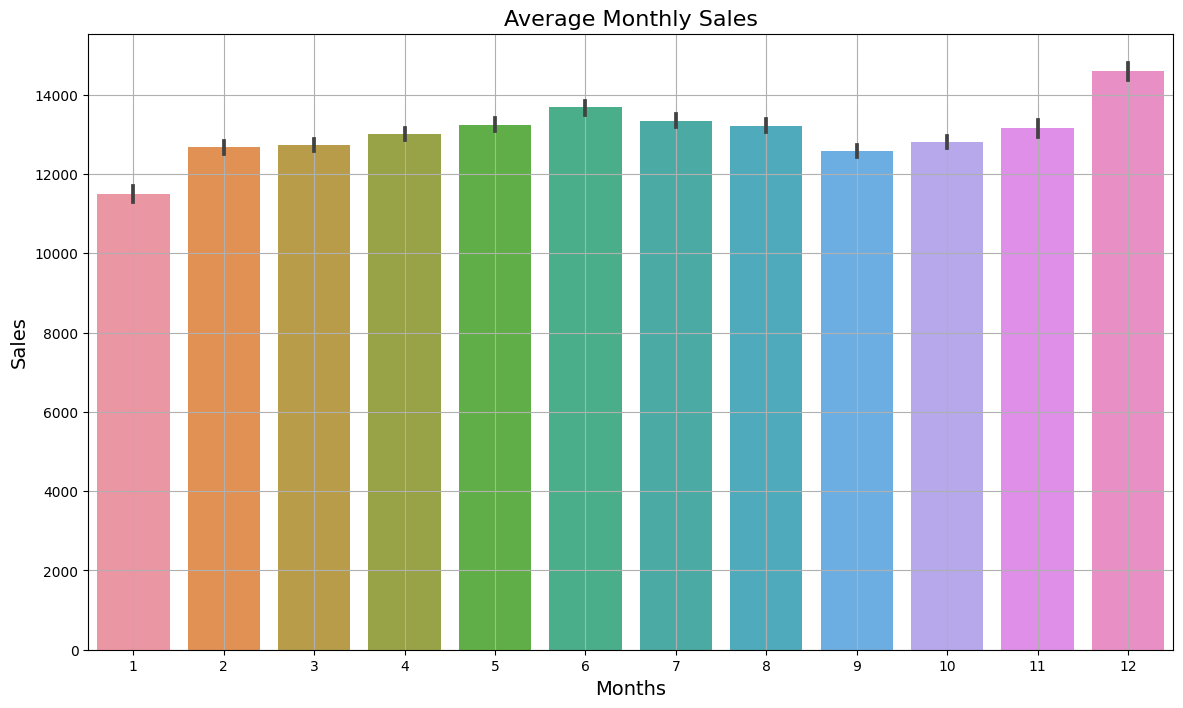

In [38]:
#Average Monthly Sales
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()
     


In [39]:
#Monthly Sales for Each Year
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly


Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


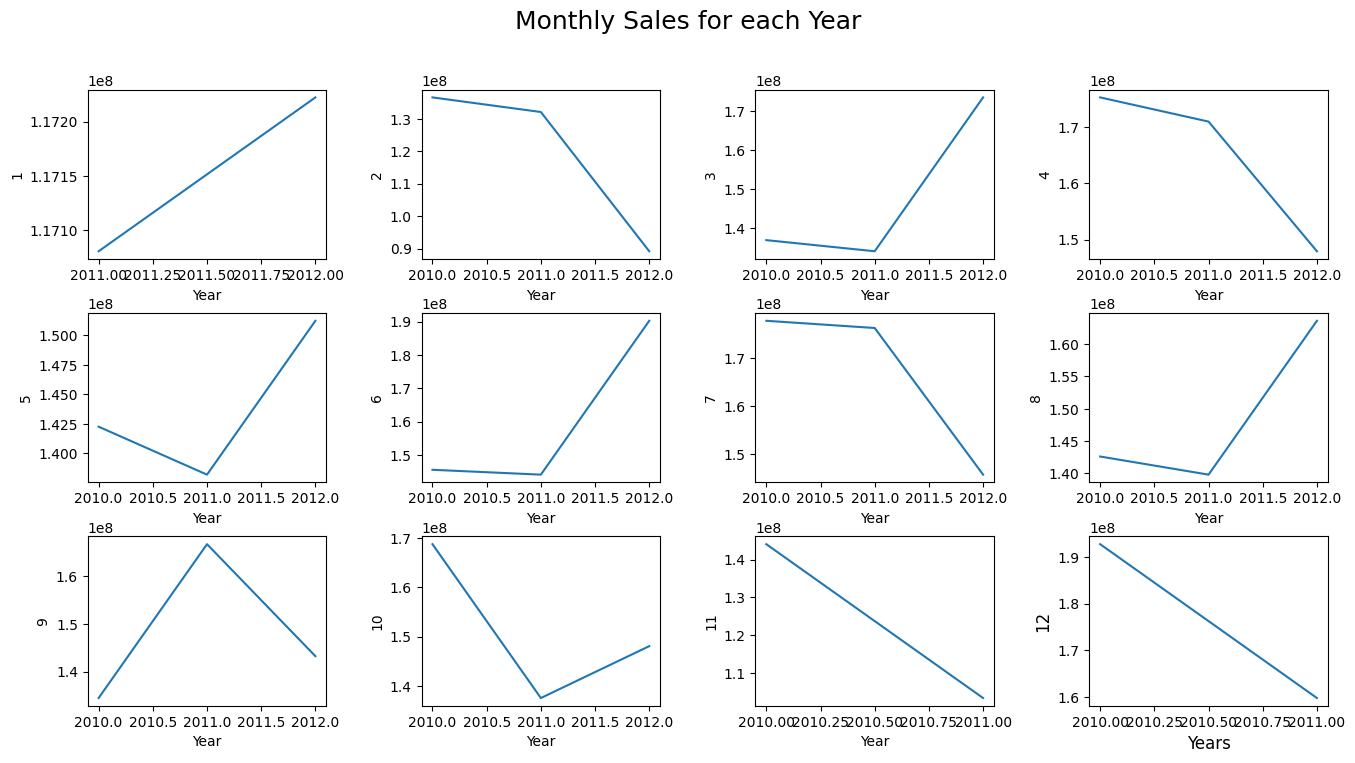

In [40]:


fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.show()
     


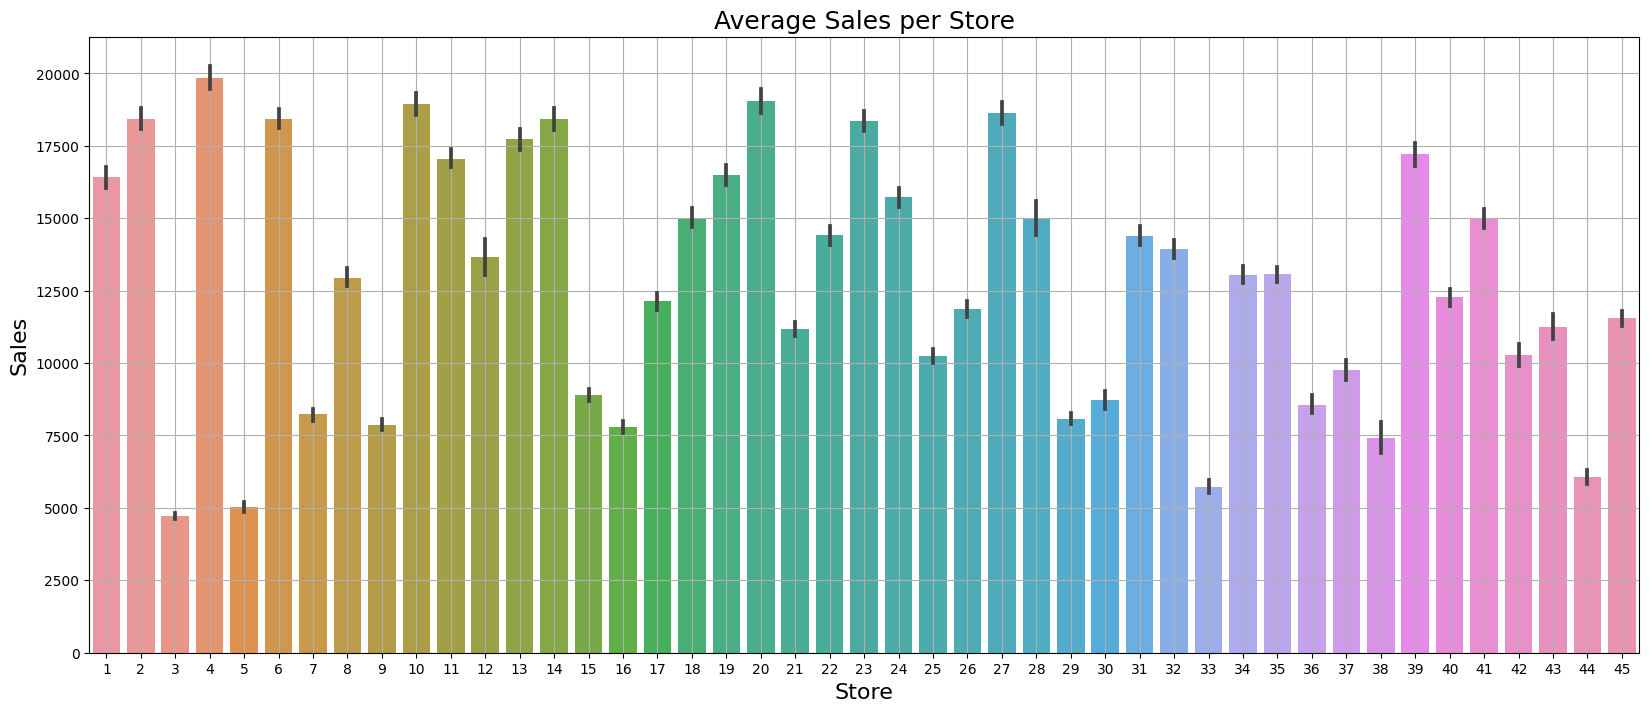

In [41]:
# Average Weekly Sales Store wise

plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()
     


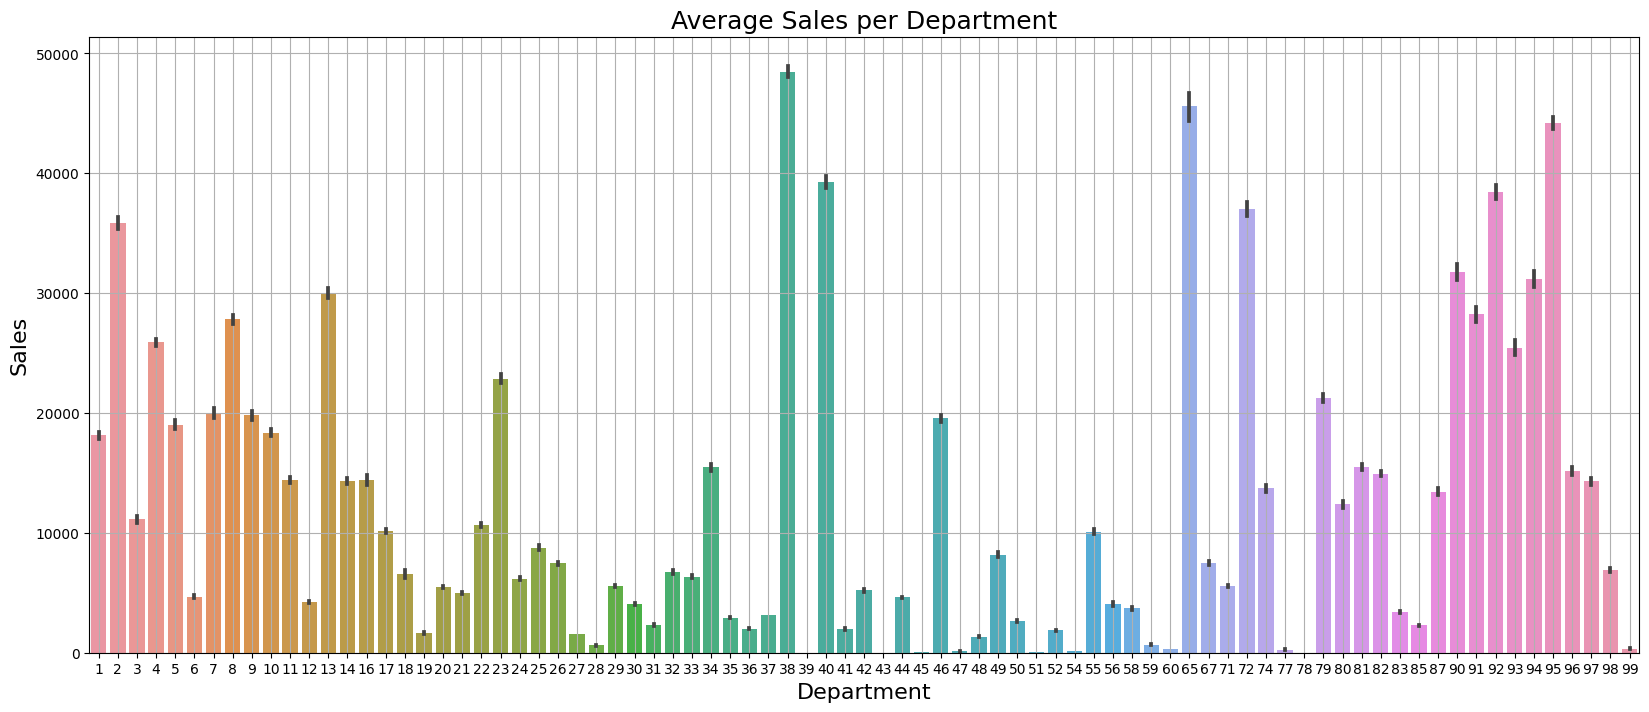

In [42]:
# Average Sales per Department
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()
     


<ipython-input-43-dd7a4567b60a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature'])


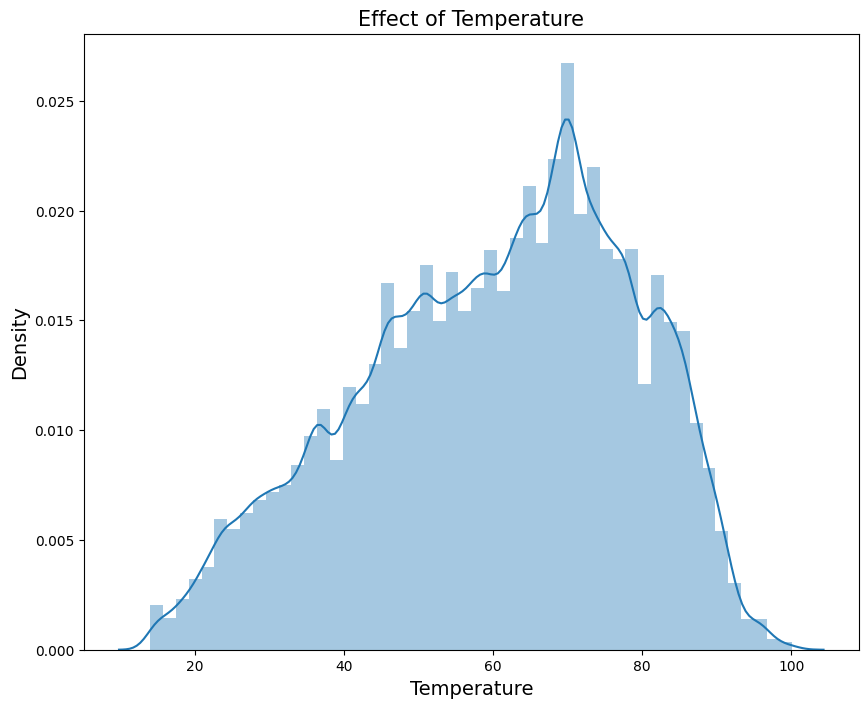

In [43]:
# Sales Vs Temperature
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

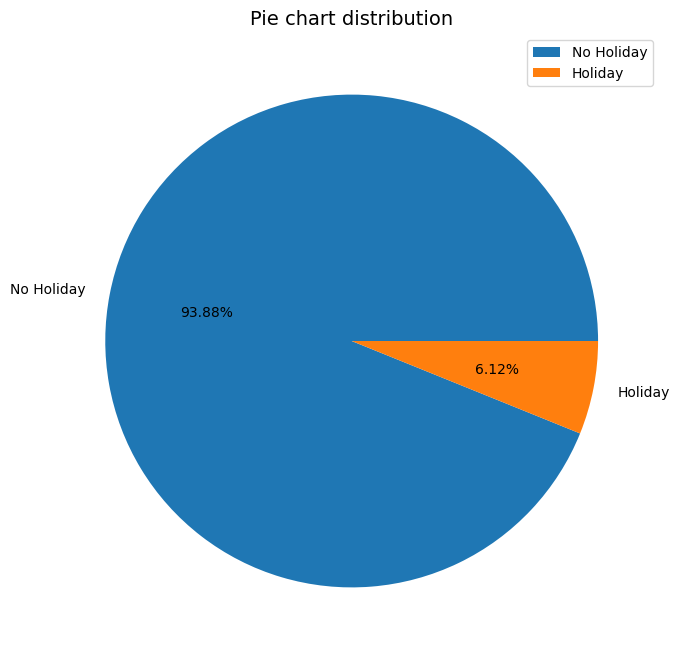

In [44]:
# Holiday Distribution


plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()
     


# Time Series Decompose

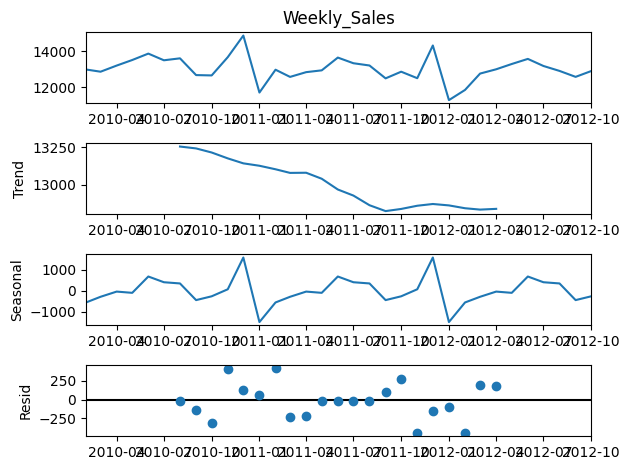

In [45]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.show()

# One-hot-encoding


In [46]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()


In [47]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,2,26,A
2012-10-26,38,23,C
2012-10-26,27,6,A
2012-10-26,36,40,A
2012-10-26,45,98,B


In [53]:


data.shape
     

(374247, 20)


data = pd.concat([data, data_cat],axis=1)
     

data.shape
     

(374247, 149)


data.drop(columns=cat_col,inplace=True)
     

data.drop(columns=['Date'],inplace=True)
     

data.shape
     



(374247, 145)


# Data Normalization

In [54]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']
     

minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df
     
data.head()
     


,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


In [55]:
data = normalization(data.copy(),num_col)


In [56]:
data.head()


,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.0501,0.840500,0.508787,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.009188,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0.009537,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.118953,0.650636,0.233627,0.0501,0.873861,0.291286,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.152888,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


# Correlation between features of dataset

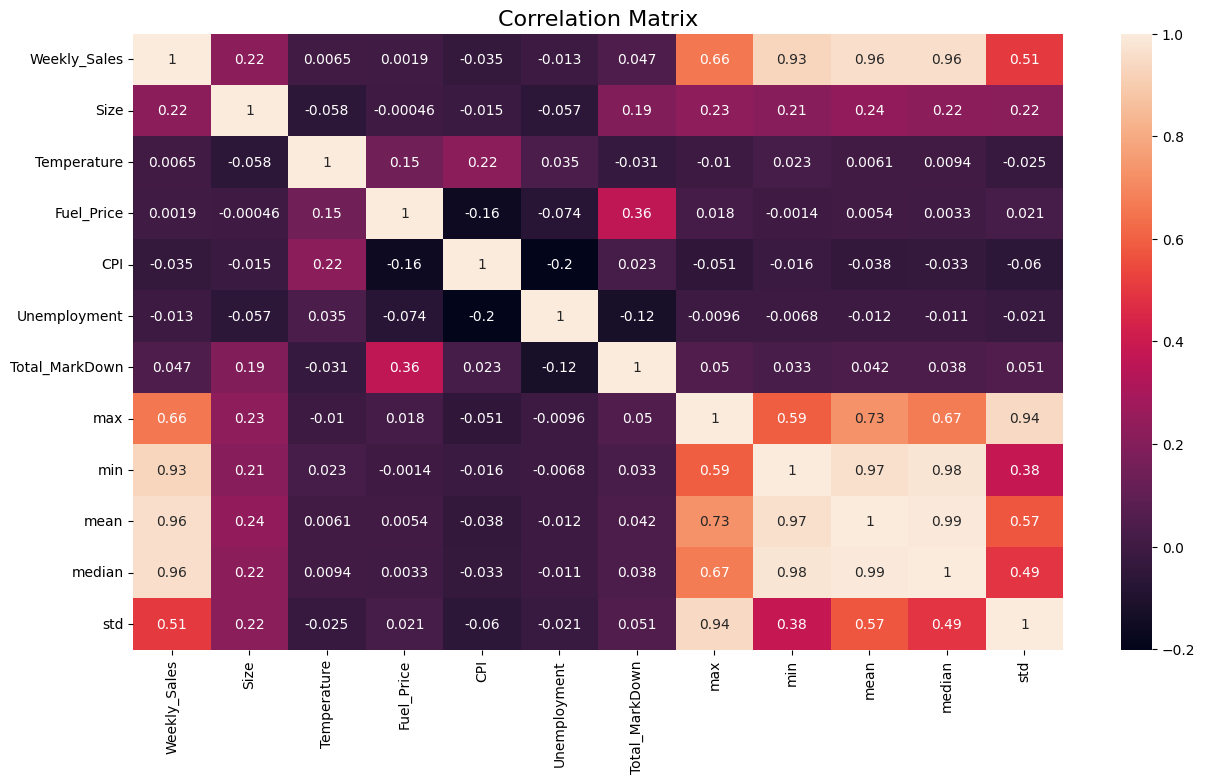

In [57]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()
     


# Recursive Feature Elimination

In [58]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col


Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_B', 'Type_C', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=144)

# Random Forest Regression

In [60]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=23, oob_score=True)

In [62]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank


,rank,feature,importance
0,1,mean,4.893535e-01
1,2,median,4.386256e-01
2,3,Week,1.960742e-02
3,4,Temperature,8.876736e-03
4,5,max,5.900547e-03
...,...,...,...
139,140,Dept_51,4.185367e-10
140,141,Dept_45,1.952018e-10
141,142,Dept_78,3.909908e-12
142,143,Dept_39,5.140648e-14


In [63]:
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)


['mean', 'median', 'Week', 'Temperature', 'max', 'CPI', 'Fuel_Price', 'min', 'std', 'Unemployment', 'Month', 'Total_MarkDown', 'Dept_16', 'Dept_18', 'Dept_3', 'IsHoliday', 'Size', 'Dept_9', 'Dept_11', 'Dept_1', 'Year', 'Dept_5', 'Dept_56']


In [64]:
X = data[x]
Y = data['Weekly_Sales']


In [65]:
data = pd.concat([X,Y],axis=1)

In [66]:


data
     


,mean,median,Week,Temperature,max,CPI,Fuel_Price,min,std,Unemployment,...,Dept_3,IsHoliday,Size,Dept_9,Dept_11,Dept_1,Year,Dept_5,Dept_56,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.208157,0.173215,5,0.328495,0.088635,0.840500,0.050100,0.253530,0.138276,0.508787,...,0,0,0.630267,0,0,1,2010,0,0,0.342576
2010-02-05,0.004499,0.004767,5,0.278565,0.001180,0.875680,0.050100,0.064648,0.004083,0.305248,...,0,0,0.492338,0,0,0,2010,0,0,0.009188
2010-02-05,0.009135,0.008968,5,0.278565,0.003866,0.875680,0.050100,0.066212,0.004314,0.305248,...,0,0,0.492338,0,0,0,2010,0,0,0.009537
2010-02-05,0.085594,0.086290,5,0.233627,0.018453,0.873861,0.050100,0.161046,0.010611,0.291286,...,0,0,0.650636,0,0,0,2010,0,0,0.118953
2010-02-05,0.080242,0.071542,5,0.278565,0.044887,0.875680,0.050100,0.126993,0.054362,0.305248,...,0,0,0.492338,0,0,0,2010,0,0,0.152888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.087055,0.082590,43,0.647585,0.030286,0.958935,0.518036,0.119050,0.039642,0.275758,...,0,0,0.906277,0,0,0,2012,0,0,0.127259
2012-10-26,0.001419,0.001617,43,0.602996,0.000446,0.050698,0.916333,0.064822,0.000478,0.760713,...,0,0,0.026063,0,0,0,2012,0,0,0.000730
2012-10-26,0.072181,0.064375,43,0.522178,0.063107,0.165055,0.801102,0.097548,0.072670,0.496028,...,0,0,0.916437,0,0,0,2012,0,0,0.073391


In [67]:
data.to_csv('/content/final_data.csv')


# Data Splitted into Training, Validation, Test


In [68]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)


# Linear Regression Model

In [73]:
lr = LinearRegression()

In [74]:
lr.fit(X_train, y_train)

LinearRegression()

In [75]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  92.28079698115758


In [76]:
y_pred = lr.predict(X_test)


In [77]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))


MAE 0.03005771492151451
MSE 0.0034851431916206573
RMSE 0.05903510135182845
R2 0.9228079866096734


In [79]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.to_csv('/content/lr_real_pred.csv')
lr_df


,Actual,Predicted
Date,,
2011-08-05,0.161661,0.132555
2010-07-09,0.364278,0.280242
2011-07-01,0.005003,0.026085
2012-01-06,0.015856,0.015369
2011-08-26,0.000318,0.002072
...,...,...
2011-01-28,0.169068,0.236392
2010-08-20,0.252860,0.235591
2010-11-26,0.265617,0.321839


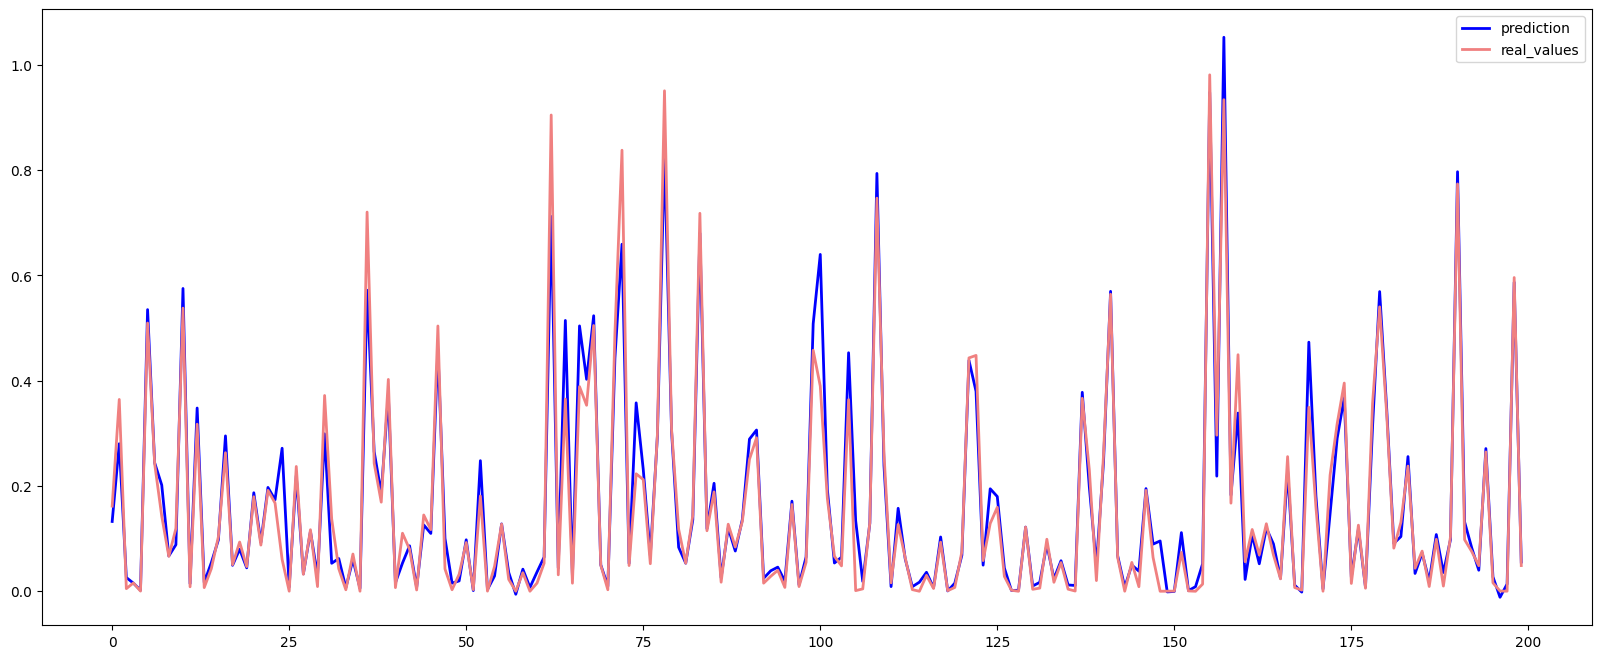

In [80]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()


In [81]:
pkl_filename = "/content/linear_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)
  print("Saved model to disk")
else:
  print("Model already saved")


Saved model to disk


# Random Forest Regressor Model

In [82]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [83]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.89660739589937


In [84]:
y_pred = rf.predict(X_test)


In [85]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.01550880111371287
MSE 0.0009496607869481688
RMSE 0.030816566761210907
R2 0.9789664610847808


In [86]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.to_csv('/content/rf_real_pred.csv')
rf_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.122641
2010-07-09,0.364278,0.330141
2011-07-01,0.005003,0.013280
2012-01-06,0.015856,0.019695
2011-08-26,0.000318,0.000577
...,...,...
2011-01-28,0.169068,0.176801
2010-08-20,0.252860,0.264137
2010-11-26,0.265617,0.375012


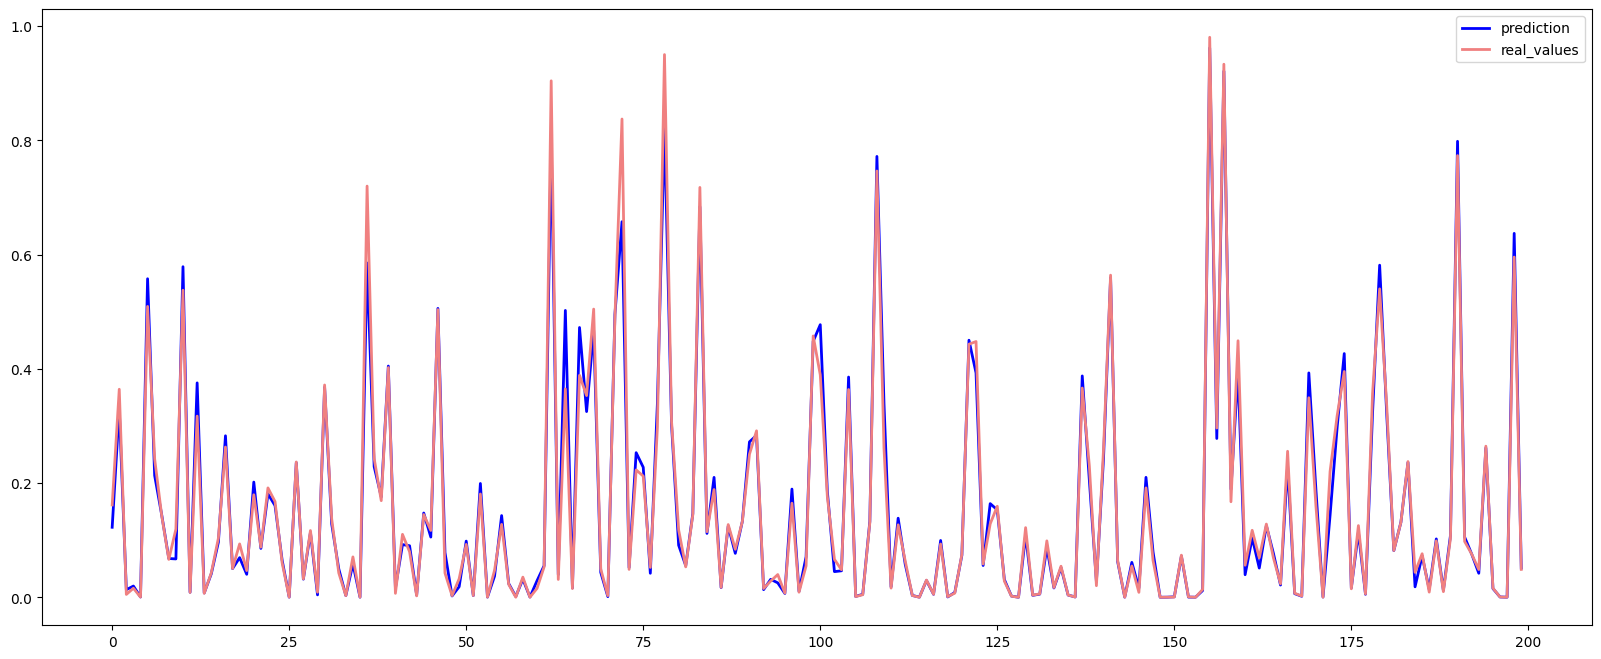

In [87]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()


In [88]:
pkl_filename = "/content/randomforest_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)
  print("Saved model to disk")
else:
  print("Model already saved")


Saved model to disk


# K Neighbors Regressor Model

In [89]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [91]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  91.97260310713533


In [92]:
y_pred = knn.predict(X_test)

In [93]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.03312215784495987
MSE 0.003624289652612284
RMSE 0.060202073490971085
R2 0.9199211027805663


In [95]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df.to_csv('/content/knn_real_pred.csv')
knn_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.112559
2010-07-09,0.364278,0.221307
2011-07-01,0.005003,0.011921
2012-01-06,0.015856,0.028551
2011-08-26,0.000318,0.001063
...,...,...
2011-01-28,0.169068,0.229475
2010-08-20,0.252860,0.262688
2010-11-26,0.265617,0.203904


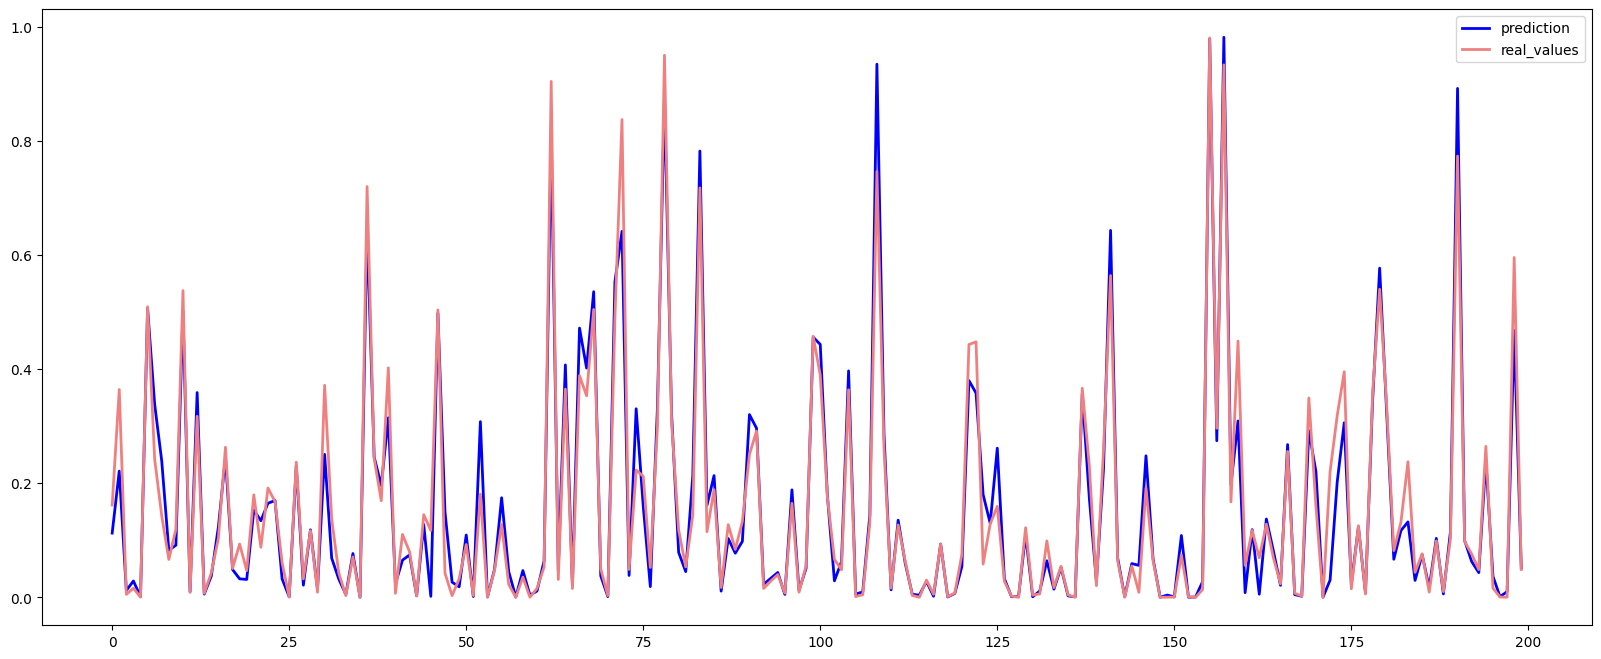

In [96]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [97]:
pkl_filename = "/content/knn_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# XGboost Model

In [98]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [99]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  97.28314112588505


In [100]:
y_pred = xgbr.predict(X_test)

In [101]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.019863883311422855
MSE 0.0012266346907320747
RMSE 0.03502334493922696
R2 0.9728314959830722


In [103]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df.to_csv('/content/xgb_real_pred.csv')
xgb_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.129809
2010-07-09,0.364278,0.325470
2011-07-01,0.005003,0.020637
2012-01-06,0.015856,0.022031
2011-08-26,0.000318,0.000333
...,...,...
2011-01-28,0.169068,0.212251
2010-08-20,0.252860,0.255506
2010-11-26,0.265617,0.355191


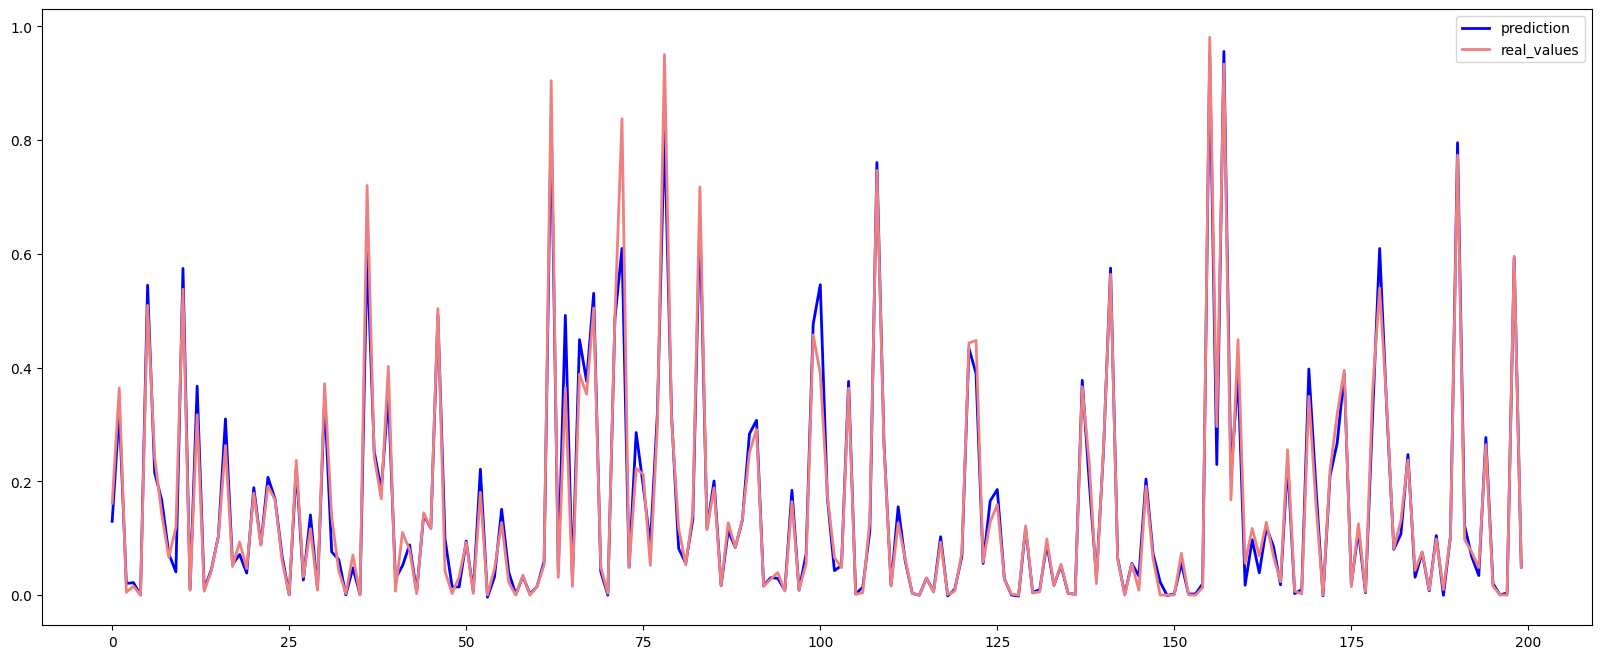

In [104]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [105]:
pkl_filename = "/content/xgboost_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(xgbr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk



# Custom Deep Learning Neural Network

In [106]:
def create_model():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='normal',activation='relu'))
  model.add(Dense(32, kernel_initializer='normal'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_absolute_error', optimizer='adam')
  return model

In [107]:
estimator_model = KerasRegressor(build_fn=create_model, verbose=1)

<ipython-input-107-63ac975bdc1f>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator_model = KerasRegressor(build_fn=create_model, verbose=1)


In [108]:
history = estimator_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=5000)

Epoch 1/100
48/48 [==============================] - 3s 23ms/step - loss: 0.4070 - val_loss: 0.1679
Epoch 2/100
48/48 [==============================] - 1s 14ms/step - loss: 0.1513 - val_loss: 0.1429
Epoch 3/100
48/48 [==============================] - 1s 14ms/step - loss: 0.1407 - val_loss: 0.1418
Epoch 4/100
48/48 [==============================] - 1s 14ms/step - loss: 0.1382 - val_loss: 0.1373
Epoch 5/100
48/48 [==============================] - 1s 16ms/step - loss: 0.1667 - val_loss: 0.1536
Epoch 6/100
48/48 [==============================] - 1s 15ms/step - loss: 0.1326 - val_loss: 0.1424
Epoch 7/100
48/48 [==============================] - 1s 15ms/step - loss: 0.1572 - val_loss: 0.1264
Epoch 8/100
48/48 [==============================] - 1s 14ms/step - loss: 0.1277 - val_loss: 0.1904
Epoch 9/100
48/48 [==============================] - 1s 10ms/step - loss: 0.1527 - val_loss: 0.1198
Epoch 10/100
48/48 [==============================] - 1s 11ms/step - loss: 0.1465 - val_loss: 0.1375

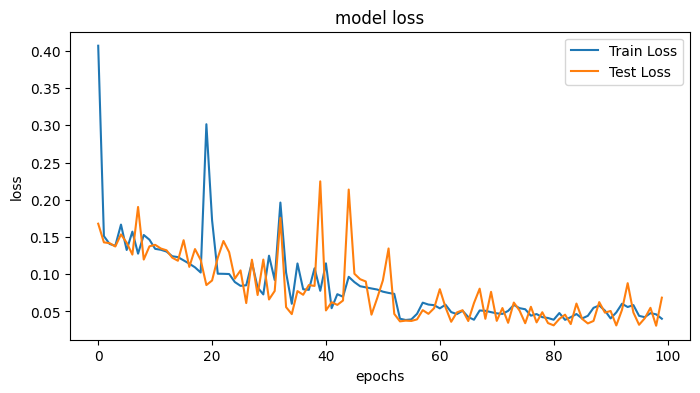

In [109]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [110]:
dnn_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network accuracy - ",dnn_acc)

Deep Neural Network accuracy -  97.17829113297519


In [111]:
y_pred = estimator_model.predict(X_test)

2340/2340 [==============================] - 4s 2ms/step


In [112]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.06849301968569424
MSE 0.0066809638377013205
RMSE 0.08173716313710258
R2 0.915850239108005


In [113]:
dnn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dnn_df.to_csv('/content/dnn_real_pred.csv')
dnn_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.172698
2010-07-09,0.364278,0.337612
2011-07-01,0.005003,0.085850
2012-01-06,0.015856,0.077944
2011-08-26,0.000318,0.077013
...,...,...
2011-01-28,0.169068,0.287035
2010-08-20,0.252860,0.287050
2010-11-26,0.265617,0.372829


4/4 [==============================] - 0s 4ms/step


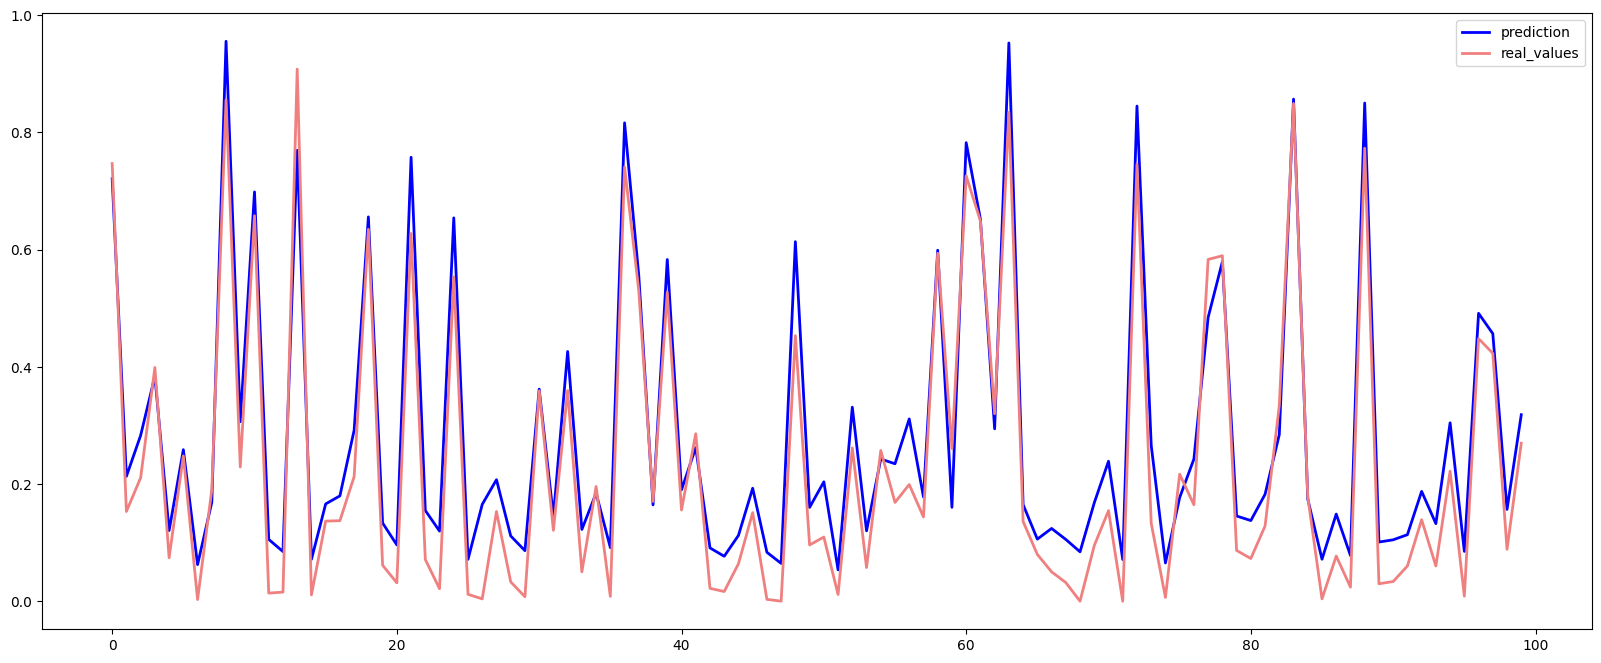

In [114]:
plt.figure(figsize=(20,8))
plt.plot(estimator_model.predict(X_test[200:300]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:300].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")

In [115]:
filepath = '/content/dnn_regressor.json'
weightspath = '/content/dnn_regressor.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  model_json = estimator_model.model.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(model_json)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk



# Comparing Models

In [116]:
acc = {'model':['lr_acc','rf_acc','knn_acc','xgb_acc','dnn_acc'],'accuracy':[lr_acc,rf_acc,knn_acc,xgb_acc,dnn_acc]}

In [117]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,lr_acc,92.280797
1,rf_acc,97.896607
2,knn_acc,91.972603
3,xgb_acc,97.283141
4,dnn_acc,97.178291


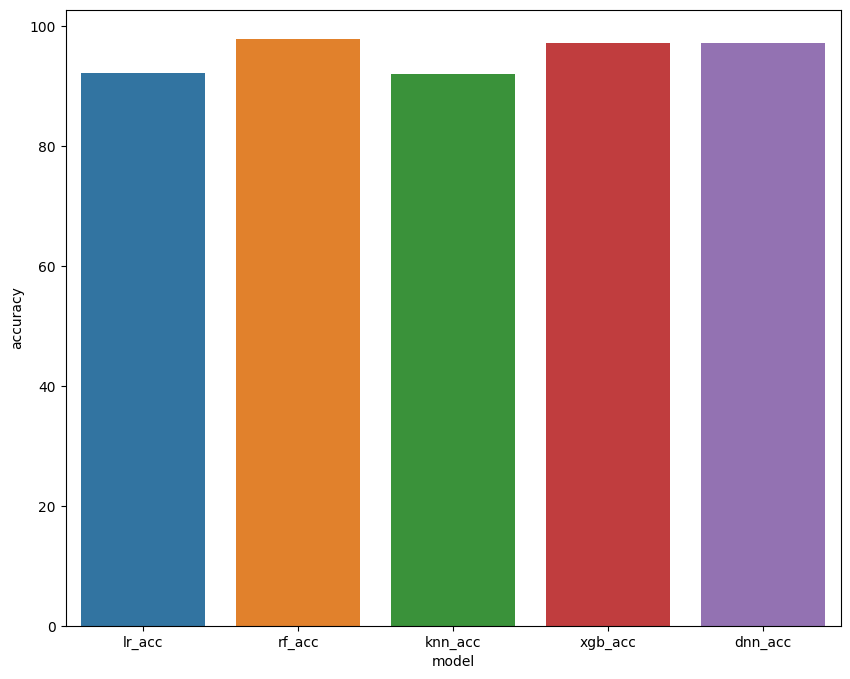

In [118]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.show()